In [ ]:
!pip install matplotlib
!pip install numpy

In [ ]:
from matplotlib import pyplot as plt
import random as rn
import numpy as np
import math

In [ ]:
x = np.linspace(-8. * np.pi, 8. * np.pi, num=101, dtype=np.float32)

In [ ]:
y1 = np.exp(-.01 * np.square(x))
y2 = y1 * np.cos(x)
y3 = (y2 + np.random.uniform(-.1, .1, size=x.size)).astype(np.float32)

In [ ]:
print("x type = ", x.dtype, "\ny1 type = ", y1.dtype, "\ny2 type = ", y2.dtype, "\n","y3 type = ", y3.dtype)

In [ ]:
np.put(y2, [40, 41, 42], np.nan)
np.put(y3, [52, 53, 54], np.nan)
print("y2[39:61] = ",y2[39:61],"\n\ny3[39:61] = ",y3[39:61])

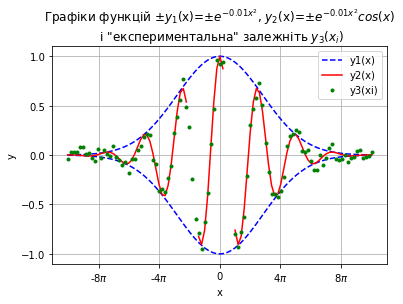

In [122]:
fig, ax = plt.subplots()
ax.plot(x, y1, "--b", label="y1(x)")
ax.plot(x, -y1, "--b")
ax.plot(x, y2, "-r", label="y2(x)")
ax.plot(x, y3, ".g", label="y3(xi)")
ax.legend()
ax.set(xlabel="x", ylabel="y", title="Графіки функцій $\pm y_1$(x)=$\pm e^{-0.01x^2}$, $y_2$(x)=$\pm e^{-0.01x^2}cos(x)$ \n і \"експериментальна\" залежніть $y_3(x_i)$")
ax.set_xticklabels(("0", "-8$\pi$", "-4$\pi$", "0", "4$\pi$", "8$\pi$"))
ax.set(yticks=np.arange(-1., 1. + .5, step=.5))
ax.grid()

In [ ]:
filtered_values = y3[np.square(y3) > .1]
print("Average = ", np.mean(filtered_values), "\nMedian = ", np.median(filtered_values))

In [ ]:
with open("x.npy", "wb") as f:
    np.save(f, x)
with open("y1.npy", "wb") as f:
    np.save(f, y1)
with open("y2.npy", "wb") as f:
    np.save(f, y2)
with open("y3.npy", "wb") as f:
    np.save(f, y3)

In [ ]:
np.savez_compressed("xyz.npz", x = x, y1 = y1, y2 = y2, y3 = y3)

In [ ]:
with np.load("xyz.npz") as data:
    x_loaded = data["x"]
    y1_loaded = data["y1"]
    y2_loaded = data["y2"]
    y3_loaded = data["y3"]

In [ ]:
print("x == x_loaded? ", np.array_equal(x, x_loaded),
"\ny1 == y1_loaded? ", np.array_equal(y1, y1_loaded),
"\ny2 == y2_loaded? ", np.array_equal(y2, y2_loaded),
"\ny3 == y3_loaded? ", np.array_equal(y3, y3_loaded),
"\nx == x_loaded(eq_nan)? ", np.array_equal(x, x_loaded, equal_nan=True),
"\ny1 == y1_loaded(eq_nan)? ", np.array_equal(x, x_loaded, equal_nan=True),
"\ny2 == y2_loaded(eq_nan)? ", np.array_equal(x, x_loaded, equal_nan=True),
"\ny3 == y3_loaded(eq_nan)? ", np.array_equal(x, x_loaded, equal_nan=True))

# y2 і y3 False, тому що при архивації значениия NaN стискаються, прибравши НаНи, ми отримаємо True.

x == x_loaded?  True 
y1 == y1_loaded?  True 
y2 == y2_loaded?  False 
y3 == y3_loaded?  False 
x == x_loaded(eq_nan)?  True 
y1 == y1_loaded(eq_nan)?  True 
y2 == y2_loaded(eq_nan)?  True 
y3 == y3_loaded(eq_nan)?  True


In [ ]:
np.savetxt("xy.csv", np.transpose((x, y1, y2, y3)), header="x,y1,y2,y3", delimiter=',')

In [ ]:
with open("xy.csv", "r") as f:
    data = np.genfromtxt(f, dtype=np.float32, skip_header=1, delimiter=',')
data

In [ ]:
array1 = np.random.rand(3, 3)
print(array1)
print(array1[0, :])

[[0.37483704 0.90549764 0.95347306]
 [0.52188153 0.73443492 0.40545598]
 [0.88382263 0.46007464 0.14087416]]
[0.37483704 0.90549764 0.95347306]
